<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Chemostat/blob/main/BPL_TEST2_Chemostat_fmpy_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Chemostat script with FMPy

The key library FMPy is installed.

After the installation a small application BPL_TEST2_Chemostat is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
!chmod +x Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
!bash ./Miniconda3-py312_24.3.0-0-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.12/site-packages/')

--2024-10-02 08:11:38--  https://repo.anaconda.com/miniconda/Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143351488 (137M) [application/octet-stream]
Saving to: ‘Miniconda3-py312_24.3.0-0-Linux-x86_64.sh’

Miniconda3-py312_24 100%[===================>] 136.71M  70.6MB/s    in 1.9s    

2024-10-02 08:11:40 (70.6 MB/s) - ‘Miniconda3-py312_24.3.0-0-Linux-x86_64.sh’ saved [143351488/143351488]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.


In [ ]:
!conda update -n base -c defaults conda --yes

Channels:
 - defaults
Platform: linux-64
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.9.24  |       h06a4308_0         130 KB
    certifi-2024.8.30          |  py312h06a4308_0         163 KB
    conda-24.9.1               |  py312h06a4308_0         1.1 MB
    frozendict-2.4.2           |  py312h06a4308_0          36 KB
    openssl-3.0.15             |       h5eee18b_0         5.2 MB
    ------------------------------------------------------------
                                           Total:         6.7 MB

The following NEW packages will be INSTALLED:

  frozendict         pkgs/main/linux-64::frozendict-2.4.2-py312h06a4308_0 

The following packages will be UPDATED:

  ca-certificates                      2024.3.11-h06a4308_0 --> 2

In [ ]:
!conda --version
!python --version

conda 24.9.1
Python 3.12.2


In [ ]:
!conda install -c conda-forge fmpy --yes # Install the key package

/usr/local/lib/python3.12/site-packages/conda/base/context.py:969: FutureWarning: Adding 'defaults' to channel list implicitly. is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly via 'conda config --add channels <name>', e.g. 'conda config --add channels defaults'.
  deprecated.topic(
/usr/local/lib/python3.12/site-packages/conda/base/context.py:969: FutureWarning: Adding 'defaults' to channel list implicitly. is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly via 'conda config --add channels <name>', e.g. 'conda config --add channels defaults'.
  deprecated.topic(
Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - fmpy


The following packages will be downloaded:

    package                    |            build
   

## Now specific installation run a simulation and notebook for that

Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Chemostat_linux_om_me.fmu
* Setup-file - BPL_TEST2_Chemostat_fmpy_explore.py

In [ ]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Chemostat

Cloning into 'BPL_TEST2_Chemostat'...


In [ ]:
%cd BPL_TEST2_Chemostat

/content/BPL_TEST2_Chemostat


## BPL_TEST2_Chemostat - demo

In [ ]:
run -i BPL_TEST2_Chemostat_fmpy_explore.py

Linux - run FMU pre-compiled OpenModelica

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

No processDiagram.png file in the FMU, but try the file on disk.


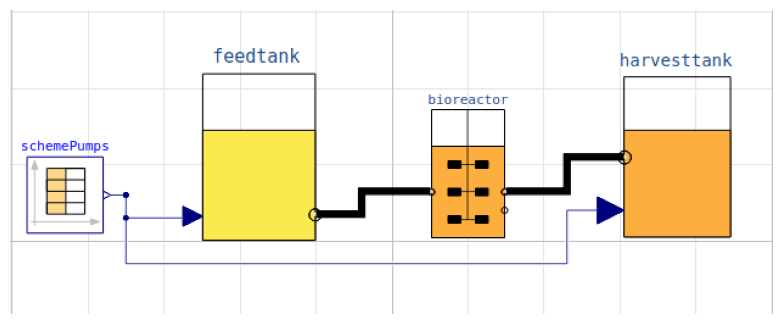

In [ ]:
process_diagram()

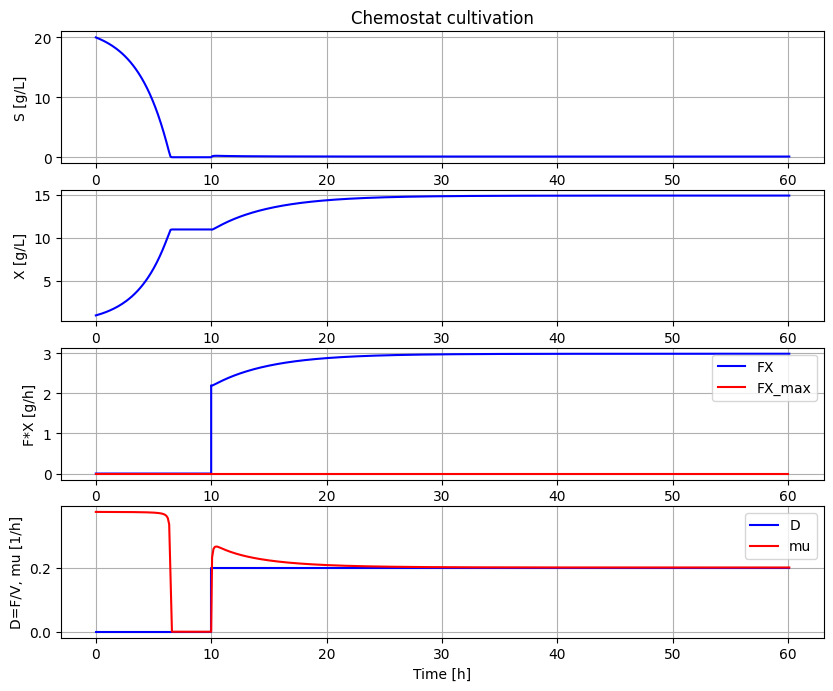

In [ ]:
newplot()
par(Y=0.50, qSmax=0.75,  Ks=0.1)               # Culture parameters
init(V_start=1.0, VX_start=1.0, VS_start=20)   # Bioreactor startup
par(S_in=30, t0=0, F0=0, t1=10, F1=0.2)        # Substrate feeding
simu(60)

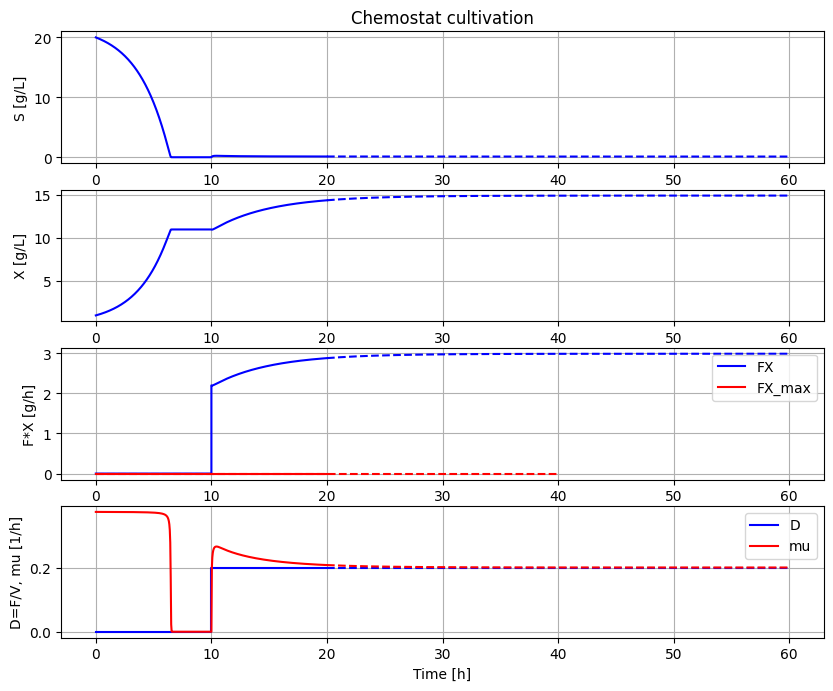

In [ ]:
# Test simu('cont')
newplot()
simu(20)
simu(40,'cont')

In [ ]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'D', 'feedtank', 'harvesttank', 'schemePumps']


In [ ]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput, CombiTimeTable, Types


In [ ]:
system_info()


System information
 -OS: Linux
 -Python: 3.10.12
 -Scipy: not installed in the notebook
 -FMPy: 0.3.20
 -FMU by: OpenModelica Compiler OpenModelica 1.25.0~dev-51-ge672d09
 -FMI: 2.0
 -Type: ME
 -Name: BPL.Examples_TEST2.Chemostat
 -Generated: 2024-10-02T09:57:52Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.2.1 - GUI
 -Interaction: FMU-explore for FMPy version 1.0.1
